In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("./data/master/master_apartaments_data_cleaned.csv", index_col = None, header=0)

In [55]:
df['pricePerSqm'] = df['price']/df['squareMeters']
df['pricePerSqm'] = df['pricePerSqm'].astype(int)


Text(0.5, 1.0, 'Rozkład Ceny za M²')

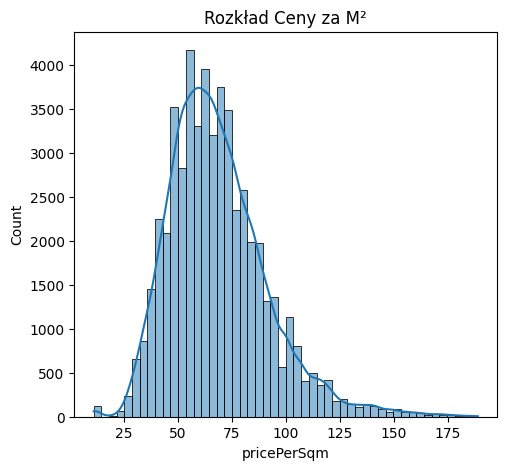

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['pricePerSqm'], kde=True, bins=50)
plt.title('Rozkład Ceny za M²')

In [57]:
df['log_price'] = np.log1p(df['price'])
current_year = 2025

df['building_age'] = np.where(
    df['buildYear'] != -1, 
    current_year - df['buildYear'], 
    -1
)

df['month'] = df['dataDate'].str.split('_').str[-1].astype(int)



In [58]:
categorical_cols = ['city', 'type', 'buildingEra', 'condition', 
                    'buildingMaterial', 'floorCount', 'hasElevator'] 

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Liczba kolumn po kodowaniu: {df_encoded.shape[1]}")

Liczba kolumn po kodowaniu: 86


In [59]:
df.to_csv('./data/master/master_apartaments_data_cleaned.csv', index=False, encoding='utf-8')
df_encoded.to_csv('./data/master/master_apartaments_data_encoded.csv', index=False, encoding='utf-8')

In [61]:
print(df.dtypes)

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                   float64
dataDate                 object
buildingEra              object
pricePerSqm               int64
log_pric